## Group 6 
### Member's : Harshini Dasri, Siddhesh Naik, Jay Mithani

**Data set**: Global Landslide \
**Aim** : To evaluate the factors causing landslides, aiming to bolster emergency response and recovery plans

## Installing all the required dependencies

In [1]:
!pip install folium pandas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import folium
import pandas as pd
from folium.plugins import MarkerCluster
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression

## Importing Data Set


### Dataset Overview

This dataset provides detailed information on landslide occurrences across various locations. Each entry in the dataset represents a unique landslide event, characterized by multiple attributes that describe the event's specifics and consequences. The data was sourced from multiple reliable databases and reports, ensuring a wide coverage of landslide incidents globally.

### Key Features

- **Source Information**: Data Set source: https://data.world/us-nasa-gov/57e5cd4b-cc93-45b6-98e0-fdb2c69bfa62
- **Event Details**: Date, time, and a brief title and description of the landslide event.
- **Location**: Descriptive and geographic data (latitude, longitude) detailing where the landslide occurred.
- **Landslide Characteristics**:
  - **Category and Size**: Classification of the landslide type and its size.
  - **Trigger**: The cause of the landslide, such as rainfall, human activity, or natural changes.
  - **Setting**: Describes the surrounding environment of the landslide (urban, rural, mountainous, etc.).
- **Impact**:
  - **Fatalities and Injuries**: Number of fatalities and injuries resulting from the landslide.
  - **Economic and Environmental Impact**: Additional notes on any economic or environmental consequences (if available).

## Goal

The primary goal of collecting and analyzing this dataset is to identify patterns and triggers of landslides, assess their impact, and improve prediction and preparedness strategies. Understanding the conditions under which landslides occur can help in mitigating their effects and planning better land-use policies.

### Analysis Goals

- **Trend Analysis**: To identify the frequency of landslides over time and correlate them with seasonal or climatic changes.
- **Geographical Analysis**: To pinpoint high-risk areas and understand geographical factors contributing to landslides.
- **Impact Assessment**: To evaluate the factors causing landslides, aiming to bolster emergency response and recovery plans.

In [2]:
# Load the dataset
file_path = 'data/rows-csv-1.csv'
data = pd.read_csv(file_path)

In [3]:
print(len(data))

11033


In [4]:
import pandas as pd

# Load the dataset
file_path = 'data/rows-csv-1.csv'
data = pd.read_csv(file_path)

# Convert 'event_date' to datetime format
data['event_date'] = pd.to_datetime(data['event_date'], errors='coerce')

# Filter the data for events between 2007 and 2017
data = data[(data['event_date'].dt.year >= 2007) & (data['event_date'].dt.year <= 2017)]

# Display the first few rows of the filtered data to confirm
print(len(data))

10988


/var/folders/hn/gj3x27n954q7vnt5xfvrz_6h0000gn/T/ipykernel_63026/585097276.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['event_date'] = pd.to_datetime(data['event_date'], errors='coerce')



## Display the first few rows of the dataset and the summary statistics

In [5]:
data.head(), data.describe()

(   source_name                                        source_link  event_id  \
 0          AGU  https://blogs.agu.org/landslideblog/2008/10/14...       684   
 1    Oregonian  http://www.oregonlive.com/news/index.ssf/2009/...       956   
 2     CBS News  https://www.cbsnews.com/news/dozens-missing-af...       973   
 3      Reuters  https://in.reuters.com/article/idINIndia-41450...      1067   
 4  The Freeman  http://www.philstar.com/cebu-news/621414/lands...      2603   
 
            event_date event_time  \
 0 2008-08-01 00:00:00        NaN   
 1 2009-01-02 02:00:00       2:00   
 2 2007-01-19 00:00:00        NaN   
 3 2009-07-31 00:00:00        NaN   
 4 2010-10-16 12:00:00      12:00   
 
                                          event_title  \
 0      Sigou Village, Loufan County, Shanxi Province   
 1                                Lake Oswego, Oregon   
 2  San Ramon district, 195 miles northeast of the...   
 3                                   Dailekh district   
 4       

## Display all column names from the dataset

In [6]:
data.columns

Index(['source_name', 'source_link', 'event_id', 'event_date', 'event_time',
       'event_title', 'event_description', 'location_description',
       'location_accuracy', 'landslide_category', 'landslide_trigger',
       'landslide_size', 'landslide_setting', 'fatality_count', 'injury_count',
       'storm_name', 'photo_link', 'notes', 'event_import_source',
       'event_import_id', 'country_name', 'country_code',
       'admin_division_name', 'admin_division_population',
       'gazeteer_closest_point', 'gazeteer_distance', 'submitted_date',
       'created_date', 'last_edited_date', 'longitude', 'latitude'],
      dtype='object')

## Performing EDA

Let's start by performing Exploratory Data Analysis (EDA) on the specified columns: 'landslide_trigger', 'latitude', 'longitude', 'country_code', and 'landslide_size'. We'll examine each column's distribution, unique values, and potential relationships between them. 

### Steps for EDA:
1. **Summary statistics and unique value examination** for each column.
2. **Visualization**:
   - Distribution of 'landslide_trigger' and 'landslide_size'.
   - Geographical distribution using 'latitude' and 'longitude'.
   - Examination of 'landslide_size' by 'country_code'.

### Exploratory Data Analysis (EDA) Summary and Descriptions for Markdown

The Exploratory Data Analysis (EDA) on the specified columns provides valuable insights into the characteristics and distributions of landslide events in the dataset. Here are descriptions for each of the analyzed columns that you can add to your Jupyter Notebook:

#### Landslide Trigger (`landslide_trigger`)
- **Description**: Indicates the cause of the landslide. Common triggers include rain, downpours, continuous rain, and tropical cyclones. This field helps identify environmental and other factors leading to landslides.
- **Insight**: The most frequent trigger for landslides in this dataset is 'downpour', suggesting that intense short-duration rainfall is a significant factor in landslide occurrences.

#### Latitude and Longitude (`latitude`, `longitude`)
- **Description**: Geographic coordinates indicating the location of each landslide event. Latitude represents the north-south position, while longitude represents the east-west position.
- **Insight**: The scatter plot shows a global distribution of landslide events, with a noticeable concentration in certain areas, suggesting geographic regions more prone to landslides.

#### Country Code (`country_code`)
- **Description**: The ISO country code representing the country where each landslide occurred. This helps in regional analysis and understanding the geographical spread of data.
- **Insight**: The dataset covers landslides from 139 different countries, with the highest number of events reported in the United States (US).

#### Landslide Size (`landslide_size`)
- **Description**: Categorizes the scale of the landslide, which can range from small, medium, and large, to very large and catastrophic. This classification helps in assessing the potential damage and impact of the landslide.
- **Insight**: The most common size of landslides in the dataset is 'medium', followed by 'small', indicating that while catastrophic landslides are less frequent, smaller and medium-sized landslides are more common and thus represent a consistent risk.

### Visualizations:
1. **Landslide Sizes**: The distribution of landslide sizes reveals that medium-sized landslides are the most frequent, pointing towards the typical severity encountered.
2. **Factality count**: The distribution of total fatalities and injuries by landslide size
3. **Landslide Triggers**: The bar chart of landslide triggers shows the frequency of each type of trigger, with 'downpour' being the most common, highlighting the impact of intense rainfall on landslide occurrences.

### 1. Landslide Sizes
The distribution of landslide sizes reveals that medium-sized landslides are the most frequent, pointing towards the typical severity encountered.

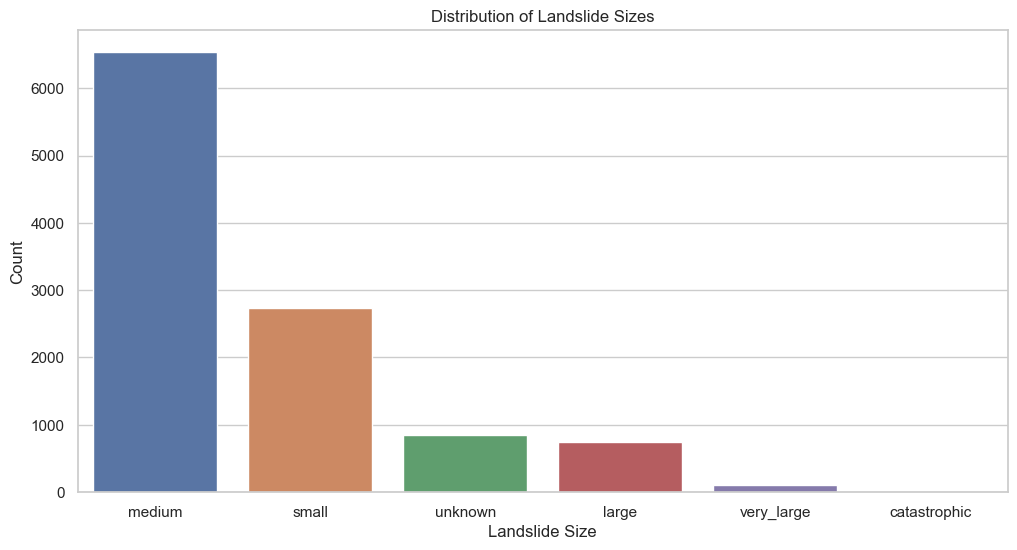

In [7]:
# Define the selected columns explicitly for clarity and further use
selected_columns = ['landslide_trigger', 'latitude', 'longitude', 'country_code', 'landslide_size']

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Summary statistics and unique values
summary_statistics = data[selected_columns].describe(include='all')
unique_values = {col: data[col].unique() for col in selected_columns}

# 2. Visualization

# Distribution of 'landslide_size'
plt.figure(figsize=(12, 6))
sns.countplot(x='landslide_size', data=data, order=data['landslide_size'].value_counts().index)
plt.title('Distribution of Landslide Sizes')
plt.xlabel('Landslide Size')
plt.ylabel('Count')
plt.show()

# summary_statistics, unique_values

### 2. Fatality count
The distribution of total fatalities and injuries by landslide size

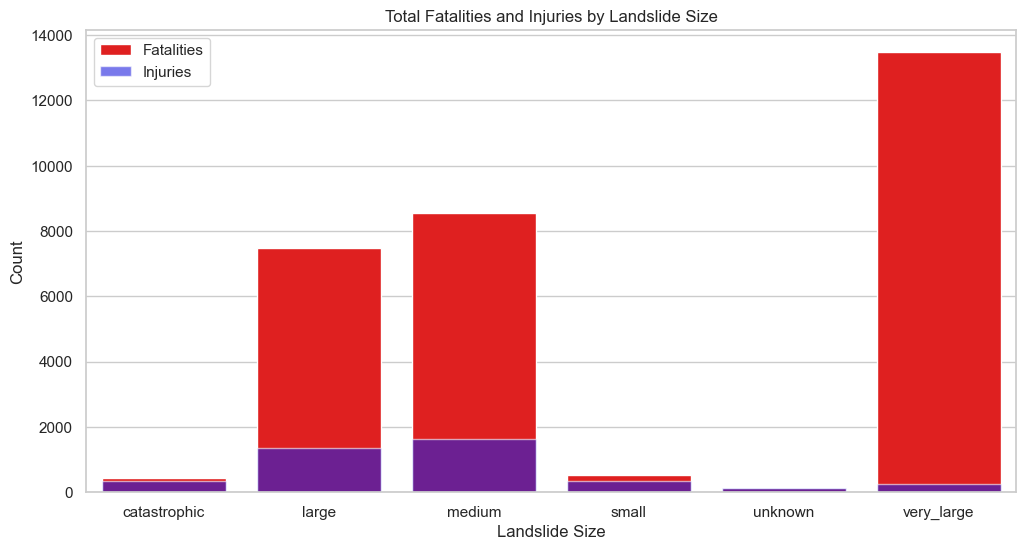

In [8]:
# First, we need to ensure that the fatality_count and injury_count columns are available and in a suitable format
data['fatality_count'] = data['fatality_count'].fillna(0)
data['injury_count'] = data['injury_count'].fillna(0)

# Grouping data by 'landslide_size' and summing 'fatality_count' and 'injury_count'
impact_by_size = data.groupby('landslide_size')[['fatality_count', 'injury_count']].sum().reset_index()

# Bar plot for total fatalities and injuries by landslide size
plt.figure(figsize=(12, 6))
sns.barplot(x='landslide_size', y='fatality_count', data=impact_by_size, color='red', label='Fatalities')
sns.barplot(x='landslide_size', y='injury_count', data=impact_by_size, color='blue', alpha=0.6, label='Injuries')
plt.title('Total Fatalities and Injuries by Landslide Size')
plt.xlabel('Landslide Size')
plt.ylabel('Count')
plt.legend()
plt.show()

### 3. Landslide Triggers
The bar chart of landslide triggers shows the frequency of each type of trigger, with 'downpour' or 'rain' related trigger being the most common, highlighting the impact of intense rainfall on landslide occurrences.

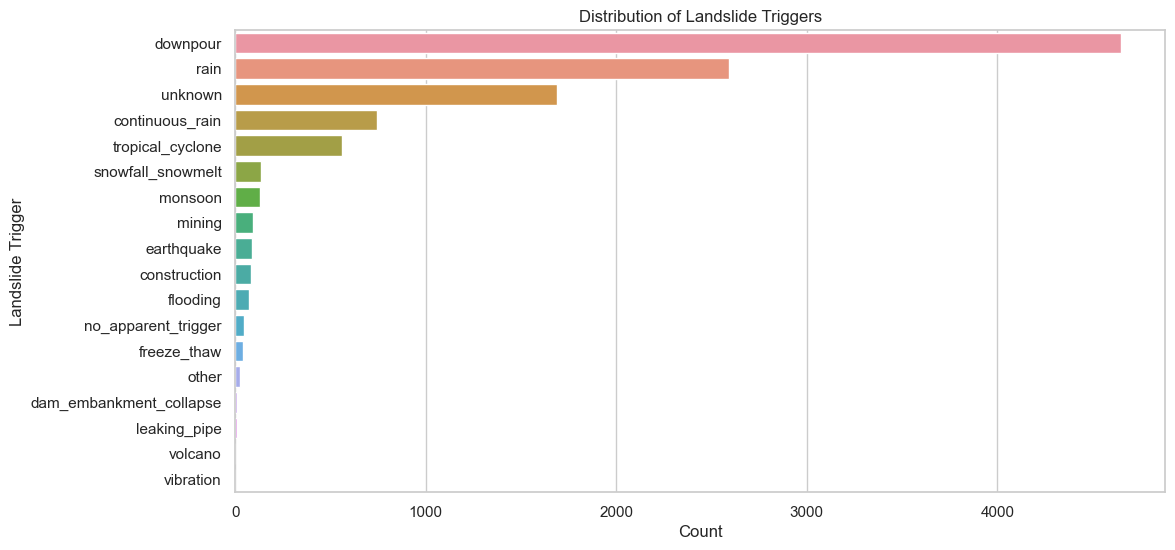

In [9]:
# Distribution of 'landslide_trigger'
plt.figure(figsize=(12, 6))
sns.countplot(y='landslide_trigger', data=data, order=data['landslide_trigger'].value_counts().index)
plt.title('Distribution of Landslide Triggers')
plt.xlabel('Count')
plt.ylabel('Landslide Trigger')
plt.show()

In [10]:
data['event_date']

0       2008-08-01 00:00:00
1       2009-01-02 02:00:00
2       2007-01-19 00:00:00
3       2009-07-31 00:00:00
4       2010-10-16 12:00:00
                ...        
11028   2017-04-01 13:34:00
11029   2017-03-25 17:32:00
11030   2016-12-15 05:00:00
11031   2017-04-29 19:03:00
11032   2017-03-13 14:32:00
Name: event_date, Length: 10988, dtype: datetime64[ns]

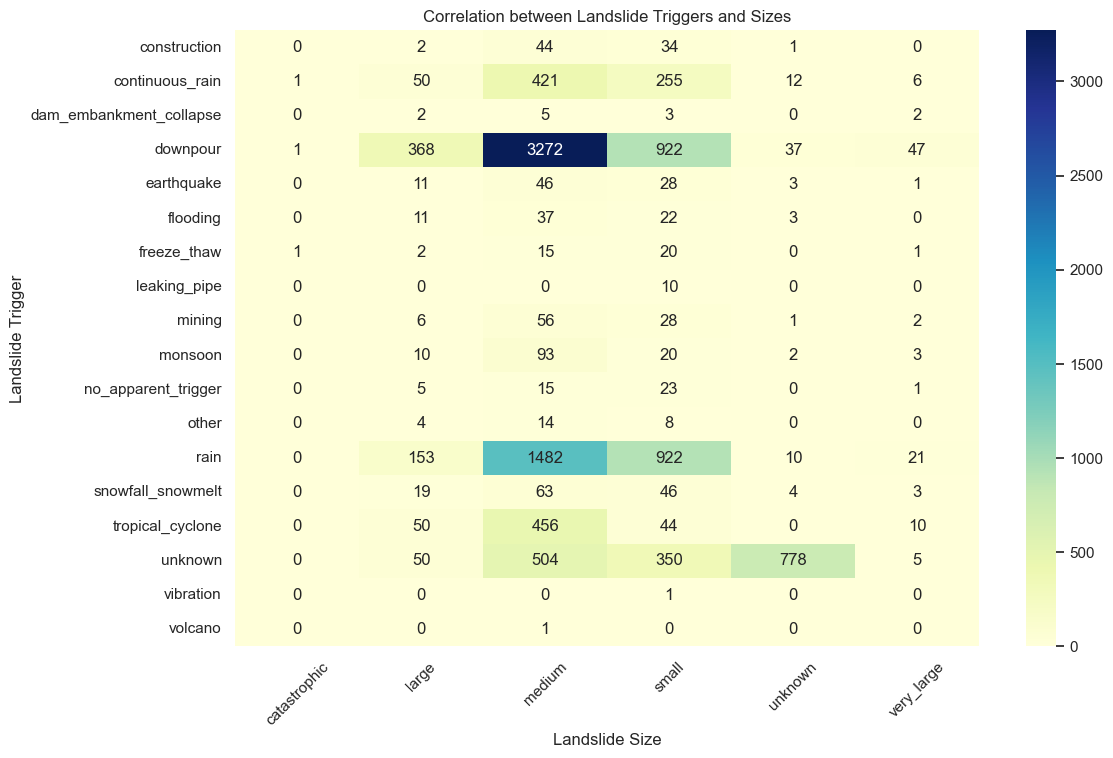

In [11]:
# Convert 'event_date' to datetime format for easier manipulation
data['event_date'] = pd.to_datetime(data['event_date'], errors='coerce')

# Plot correlation between landslide triggers and sizes
plt.figure(figsize=(12, 8))
cross_tab = pd.crosstab(data['landslide_trigger'], data['landslide_size'])
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Correlation between Landslide Triggers and Sizes')
plt.xlabel('Landslide Size')
plt.ylabel('Landslide Trigger')
plt.xticks(rotation=45)
plt.show()

## Focusing on Rain-Triggered Landslides

Given the exploratory data analysis, we observed that a significant proportion of landslide events are triggered by rain-related causes, such as downpours, continuous rain, and general rainfall. The countplot revealing these triggers shows that such conditions are predominant factors in landslide occurrences. This insight directs our analysis towards understanding the impact of rain-triggered landslides more deeply. Focusing on rain-triggered landslides allows us to:
- **Assess Vulnerability**: Identify regions and times more vulnerable to these types of landslides, enhancing predictive models for risk assessment.
- **Resource Allocation**: Guide resource allocation for preventive measures and emergency response planning, particularly during rainy seasons.
- **Policy Making**: Inform policy-making on infrastructure development and land use planning to mitigate the adverse impacts of rain-triggered landslides.

By filtering data to include only rain-triggered landslides, we aim to refine our analysis, targeting the most common triggers and therefore potentially providing more actionable insights into landslide prevention and management.

In [12]:
rain_related_triggers = ['rain', 'downpour', 'heavy rain', 'continuous rain']
rain_triggered_data = data[data['landslide_trigger'].isin(rain_related_triggers)]

# Show a summary of the filtered data
# rain_triggered_landslides.describe(include='all')

## Analyzing Landslides occurence based on latitude and Longitude 
Using the **Folium** library, the map clusters the locations to avoid overcrowding and allows users to view specific details about each landslide by clicking on the markers. The map is centered on the average coordinates of the large landslides, providing a useful visual tool for understanding the geographic distribution of significant landslide events.

In [13]:
# Filter the data for medium and large landslides
filtered_data = data[data['landslide_size'].isin(['large','medium','very_large'])]

# Create a map centered around the global average location of landslides
map = folium.Map(location=[filtered_data['latitude'].mean(), filtered_data['longitude'].mean()], zoom_start=2)

# Using MarkerCluster to manage multiple locations
marker_cluster = MarkerCluster().add_to(map)

# Add markers for medium and large landslides
for idx, row in filtered_data.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
                  popup=f"{row['event_title']}: {row['landslide_size']}").add_to(marker_cluster)
# Show the map
map

In [31]:
from folium.plugins import HeatMap
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Create a heatmap layer
heatmap_data = data[['latitude', 'longitude']]
heatmap = HeatMap(heatmap_data, radius=10, min_opacity=0.3)
world_map.add_child(heatmap)

# Display the map in the notebook
world_map

### Geographic Insights
**From the analysis of the map, it is evident that most large and very large landslides occur at higher latitudes**.

This pattern suggests a correlation between latitude and the occurrence of significant landslides, highlighting the need for targeted research and preparedness in these regions.

#### Plot the histogram of the 'latitude' column for the rain-triggered landslide data

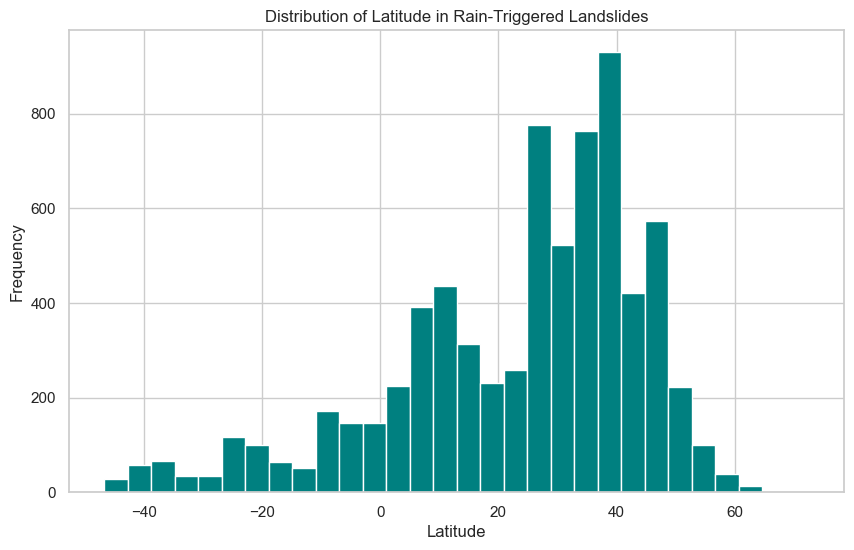

In [15]:
plt.figure(figsize=(10, 6))
rain_triggered_data['latitude'].hist(bins=30, color='teal')
plt.title('Distribution of Latitude in Rain-Triggered Landslides')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

In [16]:
rain_triggered_data['latitude'].mean()

23.54242945945344

### Fitting Beta Distribution to Latitude Data of Rain-Triggered Landslides

#### Method of Moments (MOM)
The Method of Moments is a simple and intuitive method for estimating the parameters of a statistical distribution. Using the sample's mean and variance, we calculated the parameters \( \alpha \) and \( \beta \) for the Beta distribution:

- **Sample Mean and Variance:** These were calculated directly from the transformed latitude data, ensuring that the values fall within the range [0, 1].
- **Parameter Estimation:** Using the sample moments, we derived formulas to estimate \( \alpha \) and \( \beta \) for the Beta distribution, which then allowed us to model the data distribution.

The resulting plot with the Beta distribution overlaid on the histogram of latitudes demonstrates how the model captures the overall shape of the empirical distribution, despite not fitting every detail perfectly.

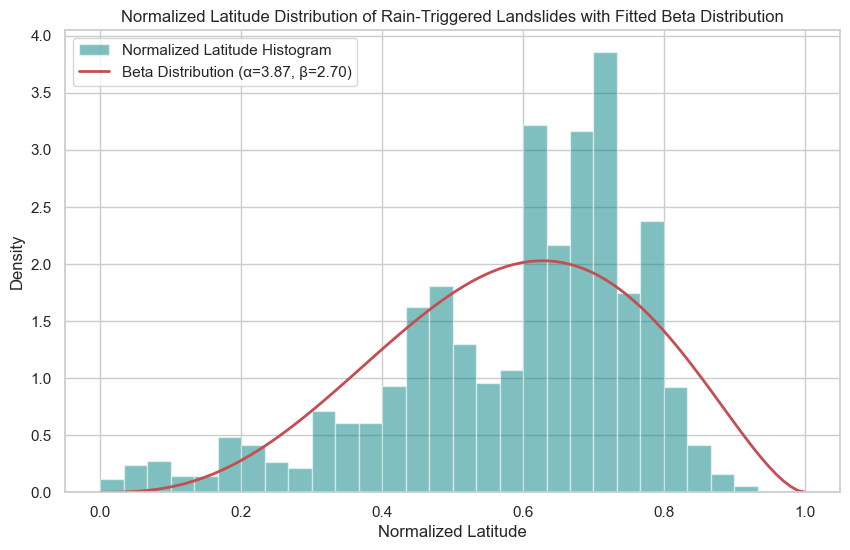

In [17]:
from scipy.stats import beta
import numpy as np

# Transform latitude values to range [0, 1]
latitude_min = rain_triggered_data['latitude'].min()
latitude_max = rain_triggered_data['latitude'].max()
transformed_latitudes = (rain_triggered_data['latitude'] - latitude_min) / (latitude_max - latitude_min)

# Calculate the first and second moments (mean and variance)
sample_mean = transformed_latitudes.mean()
sample_variance = transformed_latitudes.var()

# Method of Moments estimation for Beta distribution parameters
alpha_mom = sample_mean * ((sample_mean * (1 - sample_mean) / sample_variance) - 1)
beta_mom = (1 - sample_mean) * ((sample_mean * (1 - sample_mean) / sample_variance) - 1)

# Generate x values for the Beta distribution plot
x = np.linspace(0, 1, 100)
# Calculate the Beta PDF values
y = beta.pdf(x, alpha_mom, beta_mom)

# Plotting the histogram of transformed latitudes and the estimated Beta distribution
plt.figure(figsize=(10, 6))
plt.hist(transformed_latitudes, bins=30, color='teal', density=True, alpha=0.5, label='Normalized Latitude Histogram')
plt.plot(x, y, 'r-', lw=2, label=f'Beta Distribution (α={alpha_mom:.2f}, β={beta_mom:.2f})')
plt.title('Normalized Latitude Distribution of Rain-Triggered Landslides with Fitted Beta Distribution')
plt.xlabel('Normalized Latitude')
plt.ylabel('Density')
plt.legend()
plt.show()

#### Maximum Likelihood Estimation (MLE)
Maximum Likelihood Estimation provides a more statistically efficient method than MOM, especially for complex models:

- **Data Transformation:** Adjustments were made to ensure that all data points strictly fell within the open interval (0, 1), which is a requirement for fitting a Beta distribution.
- **Fit Implementation:** Using the `beta.fit` method from `scipy.stats`, we estimated the parameters \( \alpha \) and \( \beta \), ensuring they maximize the likelihood of observing the given data.
- **Visualization:** The fit was visualized by overlaying the estimated Beta distribution on the histogram of transformed latitude data. The MLE fit closely adheres to the empirical distribution, suggesting a good model fit.


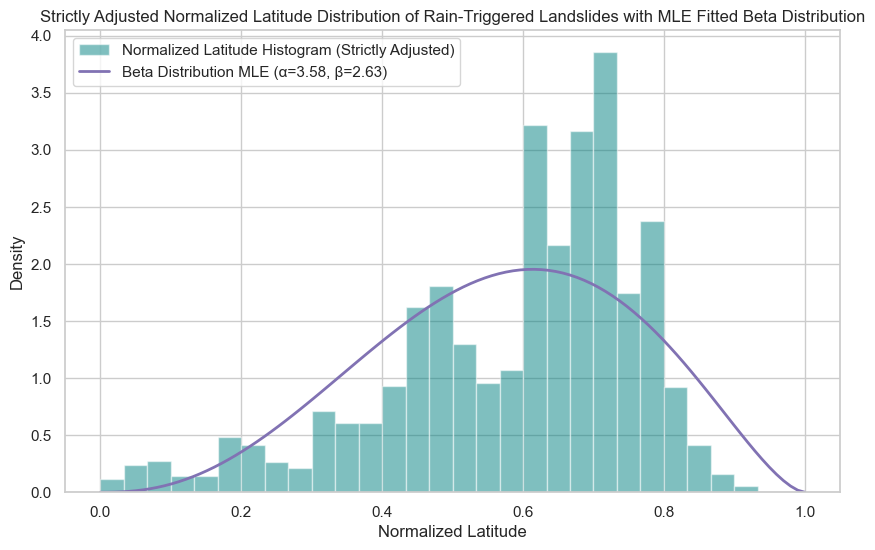

In [18]:
# More strictly ensure all transformed latitude values fall within the open interval (0, 1)
epsilon = 1e-4  # Small constant to avoid boundary values
transformed_latitudes_strict = (rain_triggered_data['latitude'] - latitude_min + epsilon) / (latitude_max - latitude_min + 2 * epsilon)

# Fit the Beta distribution using MLE again, with the strictly adjusted data
alpha_mle, beta_mle, loc_mle, scale_mle = beta.fit(transformed_latitudes_strict, floc=0, fscale=1)

# Recalculate the Beta PDF values using MLE parameters
y_mle_strict = beta.pdf(x, alpha_mle, beta_mle)

# Plotting the strictly adjusted histogram and the MLE estimated Beta distribution
plt.figure(figsize=(10, 6))
plt.hist(transformed_latitudes_strict, bins=30, color='teal', density=True, alpha=0.5, label='Normalized Latitude Histogram (Strictly Adjusted)')
plt.plot(x, y_mle_strict, 'm-', lw=2, label=f'Beta Distribution MLE (α={alpha_mle:.2f}, β={beta_mle:.2f})')
plt.title('Strictly Adjusted Normalized Latitude Distribution of Rain-Triggered Landslides with MLE Fitted Beta Distribution')
plt.xlabel('Normalized Latitude')
plt.ylabel('Density')
plt.legend()
plt.show()

## Multiclass Multinomial classification

In [19]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(file_path)

# Selecting the new set of features and the target variable
features = ['landslide_trigger', 'latitude', 'longitude', 'country_code', 'source_name']
target = 'landslide_size'

**Dropping rows with missing values in any of the selected features or the target variable**

In [20]:
data_expanded = data.dropna(subset=[target] + features)

**Encoding the categorical features**

In [21]:
encoder_expanded = OneHotEncoder(sparse=False)
encoded_categoricals = encoder_expanded.fit_transform(data_expanded[features[:-2] + features[-2:]])

/Users/jaymithani/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Getting encoded feature names**

In [22]:
encoded_feature_names_expanded = encoder_expanded.get_feature_names_out(features[:-2] + features[-2:])

**Creating a DataFrame for encoded categorical data**

In [23]:
encoded_categorical_df = pd.DataFrame(encoded_categoricals, columns=encoded_feature_names_expanded, index=data_expanded.index)

**Scaling the continuous features (latitude and longitude)**

In [24]:
scaler = StandardScaler()
scaled_continuous = scaler.fit_transform(data_expanded[['latitude', 'longitude']])

**Creating a DataFrame for scaled continuous data**

In [25]:
scaled_continuous_df = pd.DataFrame(scaled_continuous, columns=['latitude', 'longitude'], index=data_expanded.index)

**Combining all processed features with the target variable**

In [26]:
final_expanded_data = pd.concat([encoded_categorical_df, scaled_continuous_df, data_expanded[target]], axis=1)

**Splitting the data into training and testing sets**

In [27]:
X_expanded = final_expanded_data.drop(target, axis=1)
y_expanded = final_expanded_data[target]
X_train_expanded, X_test_expanded, y_train_expanded, y_test_expanded = train_test_split(
    X_expanded, y_expanded, test_size=0.2, random_state=42)

**Training the model**

In [28]:
model_expanded = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_expanded.fit(X_train_expanded, y_train_expanded)

LogisticRegression(max_iter=1000, multi_class='multinomial')

**Predicting and evaluating the expanded model**

In [29]:
y_pred_expanded = model_expanded.predict(X_test_expanded)
report_expanded = classification_report(y_test_expanded, y_pred_expanded)

print(report_expanded)

              precision    recall  f1-score   support

       large       0.50      0.02      0.04       110
      medium       0.77      0.92      0.84      1239
       small       0.59      0.41      0.48       373
     unknown       0.99      0.96      0.97       155
  very_large       0.00      0.00      0.00        17

    accuracy                           0.76      1894
   macro avg       0.57      0.46      0.47      1894
weighted avg       0.73      0.76      0.72      1894



/Users/jaymithani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaymithani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaymithani/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## RandomForest  classifier

In [30]:
data = data.dropna(subset=['landslide_size', 'landslide_trigger', 'latitude', 'longitude', 'country_code', 'source_name'])
encoder = OneHotEncoder(sparse=True)
X_categorical = encoder.fit_transform(data[['landslide_trigger', 'country_code', 'source_name']])
scaler = StandardScaler()
X_continuous = scaler.fit_transform(data[['latitude', 'longitude']])
X = hstack([X_categorical, X_continuous])
y = data['landslide_size']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

# Print the classification report
print(classification_report(y_test, predictions))

/Users/jaymithani/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


              precision    recall  f1-score   support

       large       0.29      0.10      0.15       110
      medium       0.78      0.89      0.83      1239
       small       0.60      0.45      0.51       373
     unknown       0.95      0.96      0.96       155
  very_large       0.00      0.00      0.00        17

    accuracy                           0.76      1894
   macro avg       0.52      0.48      0.49      1894
weighted avg       0.72      0.76      0.73      1894



## Conclusions
1. EDA 
- Most of the landslides size are medium and large.
- Highest fatalities are around very large landslides.
- We found most of the landslides are caused by rain-related trigger ['rain', 'downpour', 'heavy rain', 'continuous rain']. 
- Majority of medium, large and very-large landslides which are causes by rain are at high altitudes and near water bodies.

2. Distribution
- Plotting of latitude of rain triggered landslides - **Data is asymmetric and unequally distributed around the mean.**
- Because of the nature of the distribution, **Beta distribution was the best fit for our use case.**
- Used Beta MOM and MLE - **Beta MLE showed a better fit compared to Beta MOM**

3. Classification -To analyze more features(categorical features) and predict the type of landslide size
- Logistic Regression (Multiclass Multinomial classification) -> 76% accuracy
- Random Forest Classifier -> 76% accuracy

### Real-Life Impact of Analysis

- **Targeted Emergency Responses**: By predicting landslide sizes accurately, emergency management agencies can tailor their responses more effectively. For larger or catastrophic landslides, comprehensive evacuation plans and immediate deployment of emergency personnel and resources can be prioritized to ensure maximum safety.

- **Infrastructure Preparation and Reinforcement**: Areas predicted to experience severe landslides can focus on strengthening infrastructure such as roads, bridges, and buildings to withstand potential impacts. This includes installing barriers and improving drainage systems to reduce vulnerability.

- **Resource Allocation Efficiency**: Smaller landslides, while still potentially dangerous, may not require as extensive resource deployment. Predictive models allow for a more strategic allocation of resources, preventing both overuse in areas where it's not needed and shortages where it is critical.

- **Public Awareness and Community Preparedness**: Authorities can use size predictions to inform and educate the public about potential landslide risks. This involves community drills, distributing safety guidelines, and setting up local communication systems to keep residents informed and prepared.

- **Rapid Recovery Plans**: With prior knowledge of the possible extent of landslide impact, local governments and organizations can prepare more effective recovery strategies. This includes pre-arranging contracts for debris removal, road repairs, and the restoration of essential services, speeding up the recovery process and reducing economic and social disruptions.

- **Enhanced Safety Protocols**: Integrating predictive analytics into safety protocols allows for the development of more sophisticated safety measures. This might include automated alert systems that trigger evacuations or road closures based on the predicted size and impact of a landslide.

Overall, leveraging data on landslide sizes to inform disaster management practices not only enhances public safety but also contributes to more sustainable and resilient community planning and development.